# Defining soft constraints

CLEAN UP 
- The creation of "community_production" and "MAG2community_id" has been moved to "a. Notebooks - ..."

In [1]:
import pandas as pd
import reframed
import os
import json

import functions.translation_dicts as translation_dicts
import functions.general_functions as general_func

ModuleNotFoundError: No module named 'functions'

In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
compounds_dict, source_dict,substrate_dict, gas_sheet_dict, community_dict = translation_dicts.translation_dicts()

### Read data and models

**Read data**

In [65]:
all_Mags_for_paper_analysis = general_func.read_allmags_data()
all_Mags_for_paper_analysis

,Source,Substrate,Completeness (%),Contamination (%),Domain,Phylum,Class,Order,Family,Genus,Species,Genome size (bp),Scaffolds,N50,CDS prediction (DRAM),Column1,new_coverage
MAG,,,,,,,,,,,,,,,,,
CH14-bin.1,Compost_Digestate,Xylan,99.37,0.32,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Lacrimispora,Lacrimispora amygdalina_A,5147597.0,48.0,197896.0,4902.0,CH14-bin.1,54.707294
CH14-bin.2,Compost_Digestate,Xylan,99.37,0.63,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Robinsoniella,Robinsoniella peoriensis,5647052.0,70.0,172899.0,4618.0,CH14-bin.2,18.831114
CH14-bin.4,Compost_Digestate,Xylan,99.41,0.59,Bacteria,Desulfobacterota,Desulfovibrionia,Desulfovibrionales,Desulfovibrionaceae,Desulfovibrio,Desulfovibrio legallii,2785393.0,156.0,29605.0,2420.0,CH14-bin.4,2.741818
CH9-bin.0,Cow_Manure,Xylan,99.03,2.82,Bacteria,Actinobacteriota,Actinomycetia,Actinomycetales,Bifidobacteriaceae,Bifidobacterium,NaN,2513253.0,38.0,128964.0,2055.0,CH9-bin.0,70.451904
CH9-bin.6,Cow_Manure,Xylan,100.00,0.00,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Coprobacillaceae,Erysipelatoclostridium,Erysipelatoclostridium ramosum,3208880.0,42.0,126720.0,3152.0,CH9-bin.6,9.662049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CH8-bin.11,Cow_Manure,Avicel,96.47,1.28,Bacteria,Firmicutes,Clostridia,Christensenellales,CAG-74,Limiplasma,NaN,3396347.0,222.0,21687.0,2965.0,CH8-bin.11,0.496194
CH13-bin.16,Compost_Digestate,Avicel,98.31,0.00,Bacteria,Synergistota,Synergistia,Synergistales,Aminobacteriaceae,Aminobacterium,Aminobacterium colombiense,1839935.0,213.0,12044.0,1849.0,CH13-bin.16,0.467602
CH8-bin.27,Cow_Manure,Avicel,94.65,1.99,Bacteria,Firmicutes,Clostridia,Acetivibrionales,DSM-8532,NaN,NaN,3354455.0,334.0,15394.0,2862.0,CH8-bin.27,0.364448


**Load models made without soft constraints**

In [66]:
directory = os 

directory = os.fsencode("output/GEMs/GEMs_no_constraints/")

GEMs_dict = {}
for file in os.listdir(directory):
    
    filename = os.fsdecode(file)
    if filename.endswith(".xml"): 
        print(filename)
        GEMs_dict[filename[:-4]]= reframed.load_cbmodel("output/GEMs/GEMs_no_constraints/"+filename)
        continue
    else:
        continue

CH9-bin.8.xml
CH7-bin.24.xml
CH7-bin.18.xml
CH15-bin.7.xml
CH13-bin.10.xml
CH13-bin.0.xml
CH1-bin.4.xml
CH1-bin.5.xml
CH13-bin.1.xml
CH13-bin.11.xml
CH15-bin.6.xml
CH7-bin.2.xml
CH7-bin.25.xml
CH15-bin.4.xml
CH15-bin.18.xml
CH13-bin.13.xml
CH1-bin.10.xml
CH1-bin.7.xml
CH1-bin.6.xml
CH13-bin.2.xml
CH13-bin.12.xml
CH15-bin.5.xml
CH7-bin.1.xml
CH15-bin.1.xml
CH13-bin.16.xml
CH13-bin.6.xml
CH1-bin.2.xml
CH1-bin.3.xml
CH13-bin.17.xml
CH15-bin.0.xml
CH15-bin.20.xml
CH7-bin.4.xml
CH7-bin.23.xml
CH7-bin.21.xml
CH7-bin.6.xml
CH15-bin.22.xml
CH15-bin.2.xml
CH1-bin.1.xml
CH1-bin.0.xml
CH13-bin.4.xml
CH13-bin.14.xml
CH15-bin.3.xml
CH15-bin.23.xml
CH7-bin.20.xml
CH8-bin.8.xml
CH8-bin.9.xml
CH8-bin.27.xml
CH8-bin.25.xml
CH14-bin.4.xml
CH8-bin.20.xml
CH14-bin.1.xml
CH8-bin.21.xml
CH14-bin.2.xml
CH8-bin.22.xml
CH8-bin.0.xml
CH8-bin.12.xml
CH8-bin.2.xml
CH8-bin.11.xml
CH8-bin.29.xml
CH8-bin.7.xml
CH8-bin.6.xml
CH3-bin.2.xml
CH8-bin.14.xml
CH8-bin.16.xml
CH3-bin.0.xml
CH8-bin.4.xml
CH8-bin.5.xml
CH3-bin

### Make overview of all compounds measured the enrichment cultures

The strategy for defining if the compound is produced or not is:
- Assuming that positive concertation==the compound is produced by the community

In [67]:
community_production = {}

# For each source 
for name, id_source in source_dict.items():
    
    # Read and process excel sheet
    ## Get the Excel sheet specifically for the source
    data_df = pd.read_excel("input/files_from_fairdomhub/enrichment_cultures _data.xlsx",sheet_name=name)
    data_df.dropna(how='all', axis='columns',inplace=True)
    
    data_df = data_df.iloc[:,1:-1]
    data_df.set_index("Sample name ",inplace=True)
    data_df.columns = [col.replace(" ","") for col in data_df.columns]
    
    # For each substrate
    for name_sub,id_sub in substrate_dict.items():
        community_id = id_source+"_"+id_sub
                
        if community_id=="M_A": # Marshland on Avicel is not a combination in our experiments.
            continue
        
        community_production[community_id]={}
        data_df_sub_max = data_df[data_df.index.str.contains(community_id)].max()
        
        # For each compound in our analysis
        for compound in compounds_dict.keys():
            if compound not in data_df_sub_max.index:
                print(community_id)
                print(compound + " not in columns")
                continue
            
            # If max concentration is higher than 0 -> assume that it is produced by a community member
            if data_df_sub_max[compound]>0:
                community_production[community_id]["R_EX_"+compounds_dict[compound]+"_e"]=1
                
        # These gasses where observed for all enrichment cultures. (for gasses CH4 is not included because it is not a part of the bacterial universal model)
        community_production[community_id]["R_EX_h2_e"]=1
        community_production[community_id]["R_EX_co2_e"]=1

# Defining soft constraints (vol. 2)

- **Excluding elements that can already be produced by a community member in complete media**
    - Choose complete media - because production could be triggered by metabolites produced by another community members, which we do not know of.
- **Focus on 99% most abundant species**

**Process data**

In [68]:
all_Mags_for_paper_analysis.groupby(["Source","Substrate"]).sum()["new_coverage"]

Source             Substrate
Compost_Digestate  Avicel       91.952889
                   PASC         92.680781
                   Xylan        76.280226
Cow_Manure         Avicel       87.170797
                   PASC         89.739880
                   Xylan        90.216698
Marshland          PASC         97.071775
                   Xylan        97.097080
Name: new_coverage, dtype: float64

In [32]:
MAG2community_id = pd.Series({MAG:community_dict[community_id] for community_id,MAGs in all_Mags_for_paper_analysis.groupby(["Source","Substrate"]).groups.items() for MAG in MAGs})
MAG2community_id

CH13-bin.12    CD_A
CH13-bin.11    CD_A
CH13-bin.4     CD_A
CH13-bin.14    CD_A
CH13-bin.25    CD_A
               ... 
CH1-bin.5       M_P
CH1-bin.0       M_P
CH3-bin.2       M_X
CH3-bin.1       M_X
CH3-bin.0       M_X
Length: 101, dtype: object

### Find the producers (from the 99% most abundant species)

**Get 99% most abundant species (>1%)**

In [69]:
relevant_MAGs = list(all_Mags_for_paper_analysis[all_Mags_for_paper_analysis["new_coverage"]>1].index)

## Find the community they belong to
MAG2community_id_most_abundant = MAG2community_id[MAG2community_id.index.isin(relevant_MAGs)]
enrich_groups_top = pd.DataFrame(MAG2community_id_most_abundant).groupby(0).groups# top 99
enrich_groups = pd.DataFrame(MAG2community_id).groupby(0).groups   # all

## Find producers in COMPLETE media and growth=0

# For each community set the default production to False
comm_producers = {community_id:{MAG:{rxn:False for rxn in rxns} for MAG in enrich_groups[community_id]} for community_id,rxns in community_production.items()}
comm_producers_top = {community_id:{MAG:{rxn:False for rxn in rxns} for MAG in enrich_groups_top[community_id]} for community_id,rxns in community_production.items()}

for community_id,MAGs in enrich_groups.items():
    for MAG in MAGs:
        print(MAG)

        model = GEMs_dict[MAG]
        complete_env = reframed.Environment.from_model(model)
        sol = reframed.FVA(model,constraints=complete_env,reactions=[rxn for rxn in community_production[community_id].keys() if rxn in model.reactions])

        for rxn,sol_rxn in sol.items():
            comm_producers[community_id][MAG][rxn]=sol_rxn[1]>1e-6
            
            if MAG in relevant_MAGs:
                comm_producers_top[community_id][MAG][rxn]=sol_rxn[1]>1e-6

CH13-bin.12
CH13-bin.11
CH13-bin.4
CH13-bin.14
CH13-bin.25
CH13-bin.17
CH13-bin.0
CH13-bin.1
CH13-bin.13
CH13-bin.2
CH13-bin.6
CH13-bin.19
CH13-bin.24
CH13-bin.8
CH13-bin.21
CH13-bin.22
CH13-bin.20
CH13-bin.10
CH13-bin.16
CH15-bin.0
CH15-bin.23
CH15-bin.1
CH15-bin.7
CH15-bin.8
CH15-bin.22
CH15-bin.6
CH15-bin.17
CH15-bin.16
CH15-bin.13
CH15-bin.12
CH15-bin.5
CH15-bin.10
CH15-bin.15
CH15-bin.2
CH15-bin.11
CH15-bin.20
CH15-bin.3
CH15-bin.18
CH15-bin.4
CH14-bin.1
CH14-bin.2
CH14-bin.4
CH8-bin.22
CH8-bin.17
CH8-bin.7
CH8-bin.2
CH8-bin.6
CH8-bin.25
CH8-bin.5
CH8-bin.9
CH8-bin.16
CH8-bin.21
CH8-bin.8
CH8-bin.29
CH8-bin.14
CH8-bin.4
CH8-bin.12
CH8-bin.11
CH8-bin.27
CH8-bin.20
CH8-bin.0
CH7-bin.23
CH7-bin.16
CH7-bin.11
CH7-bin.13
CH7-bin.2
CH7-bin.8
CH7-bin.18
CH7-bin.1
CH7-bin.17
CH7-bin.4
CH7-bin.12
CH7-bin.20
CH7-bin.9
CH7-bin.6
CH7-bin.15
CH7-bin.24
CH7-bin.14
CH7-bin.25
CH7-bin.21
CH9-bin.0
CH9-bin.6
CH9-bin.5
CH9-bin.1
CH9-bin.2
CH9-bin.4
CH9-bin.8
CH1-bin.6
CH1-bin.9
CH1-bin.3
CH1-bin.4


#### Plotting production

In [70]:
dfs_community_count = {community_id:pd.DataFrame(producers_dict).sum(axis=1).rename("all") for community_id,producers_dict in comm_producers.items()}
dfs_community_count_top = {community_id:pd.DataFrame(producers_dict).sum(axis=1).rename("top99%") for community_id,producers_dict in comm_producers_top.items()}
dfs_community_count_concat = {community_id:pd.concat([s1,dfs_community_count_top[community_id]],axis=1) for community_id,s1 in dfs_community_count.items()}

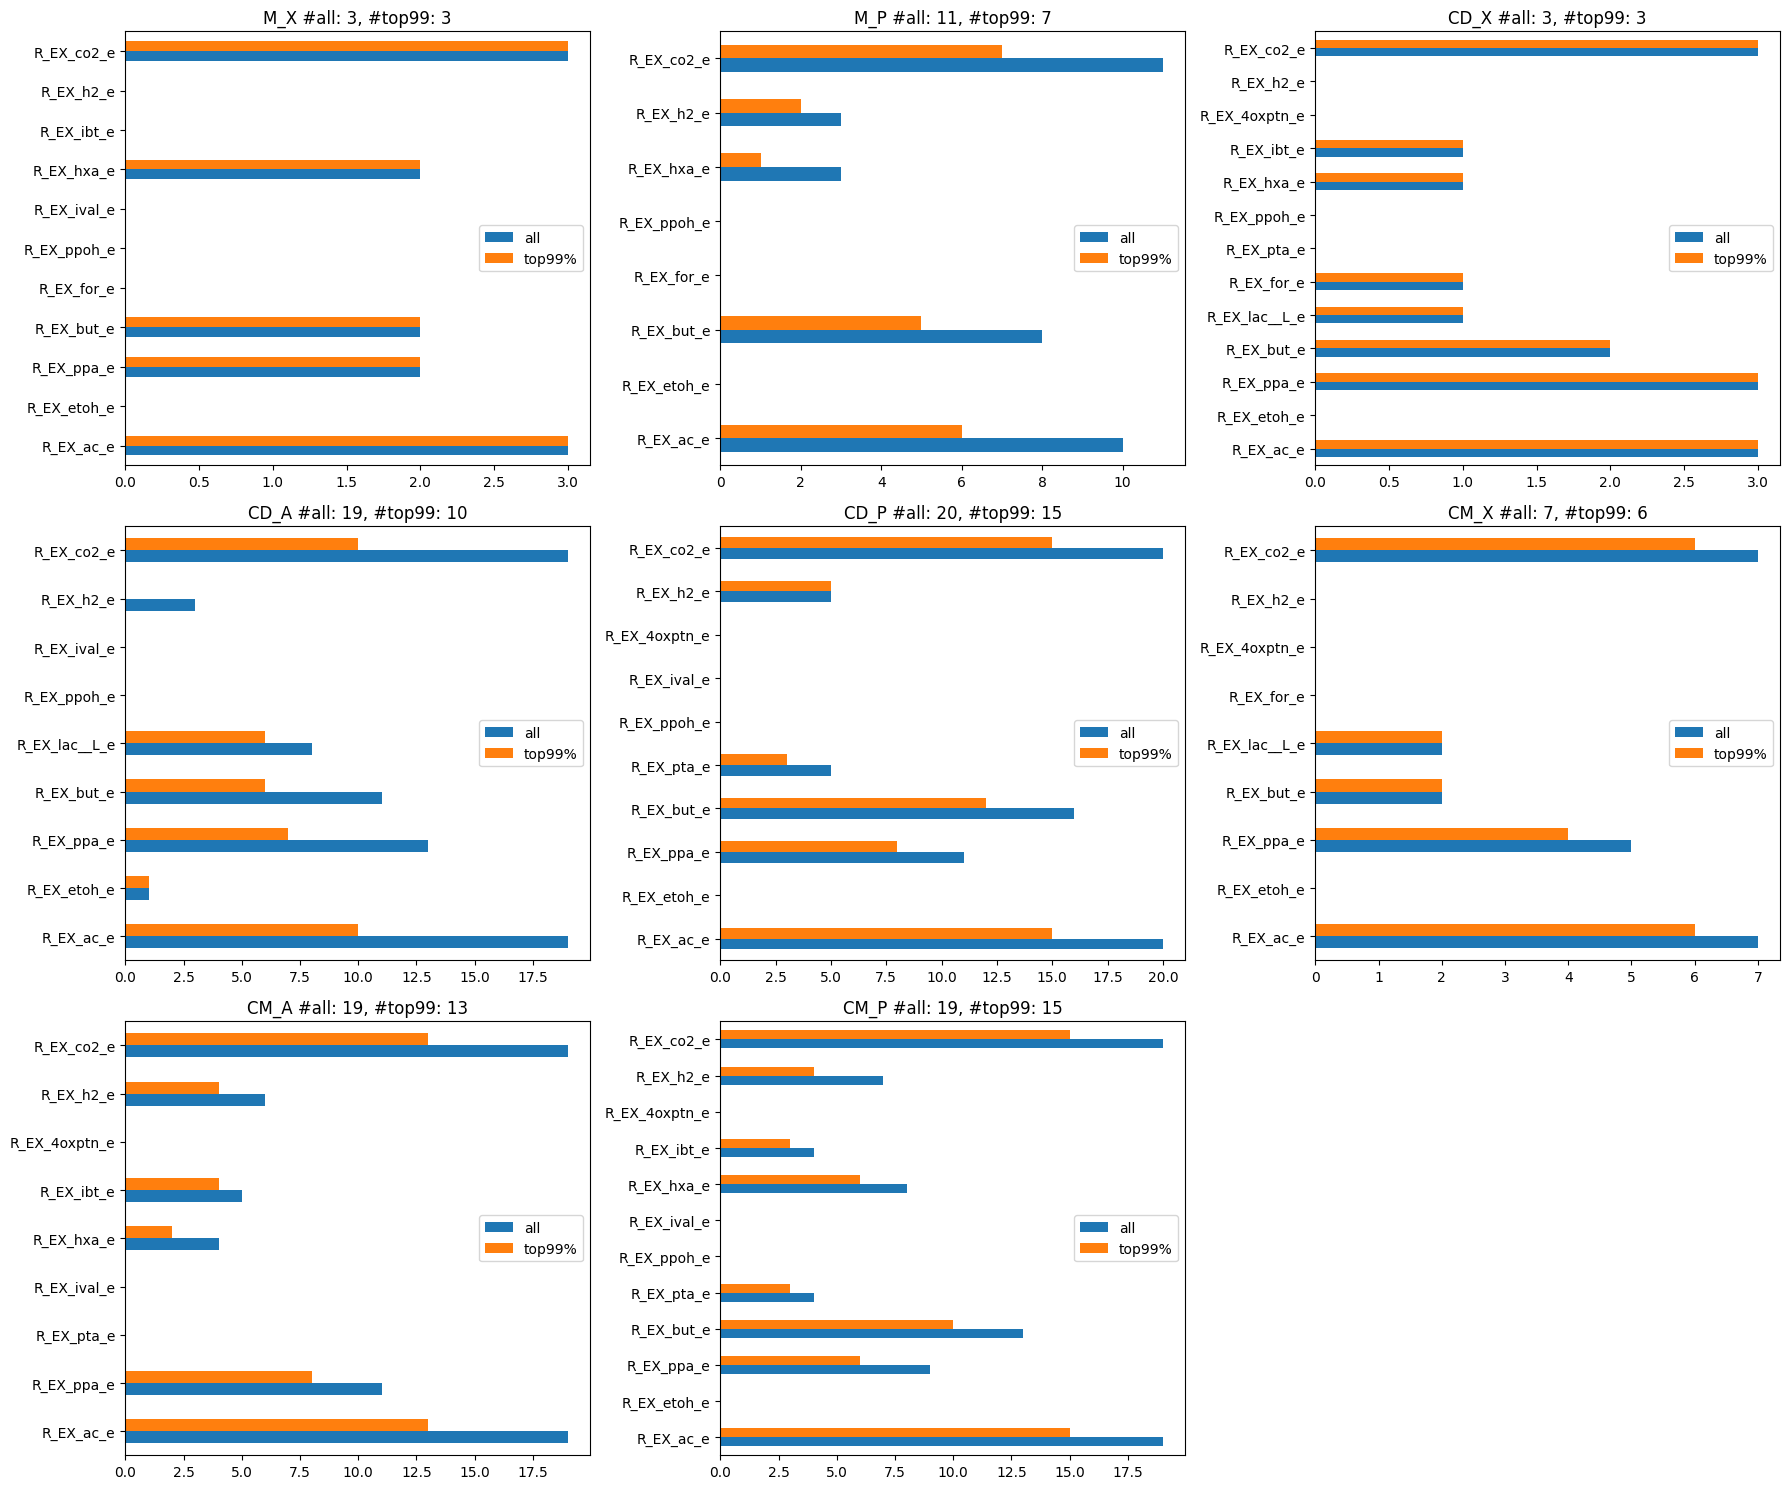

In [71]:
import matplotlib.pyplot as plt
import math

rows = math.ceil(len(dfs_community_count_concat.keys())/3)
fig, axs = plt.subplots(rows,3, figsize=(18,5*rows))

i = 0

for community_id,df in dfs_community_count_concat.items():
    df.plot(kind="barh", ax=axs[math.floor(i/3)][i%3])
    axs[math.floor(i/3)][i%3].title.set_text(community_id+" #all: "+str(len(comm_producers[community_id].keys())) + ", #top99: "+str(len(comm_producers_top[community_id].keys())))
    i = i+1
    
axs[2,2].set_axis_off()
fig.tight_layout()

In [72]:
soft_constraints_new = {}

for community_id,producers_df in dfs_community_count_top.items():
    # Find compounds not produced
    not_produced = producers_df[producers_df==0].index
    
    soft_constraints_new[community_id]={}
    
    for rxn in not_produced:
        soft_constraints_new[community_id][rxn]=1
        
    

In [73]:
relevant_MAGs_str = "\t\n".join(relevant_MAGs)
relevant_MAGs_str = relevant_MAGs_str+"\t"

### Save data

In [49]:
for community_id, dict_ in soft_constraints_new.items():
    pd.DataFrame(pd.Series(dict_)).to_csv("output/soft_constraints/SC_"+community_id+".tsv",
                                          sep="\t",
                                          header=False,
                                          index_label=False)

In [50]:
with open("output/relevant_MAGs_99.txt", "w") as text_file:
    text_file.write(relevant_MAGs_str)

In [51]:
MAG2community_id.to_csv("output/MAG2community_id.tsv",sep="\t",header=False)


In [52]:
with open("output/community_production.json", "w") as outfile: 
    json.dump(community_production, outfile)